## Part I : Programming Assignment

In [ ]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
house = pd.read_csv("train.csv")

In [3]:
# check the dimension of dataframe
house.shape

(1460, 81)

In [4]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# head
pd.set_option('display.max_columns', 500)
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
#Statistical aspects of the dataframe
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Data Cleaning

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
round(100*(house.isnull().sum())/len(house), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

#### Dropping the columns having high percentage of missing values 

In [9]:
house.drop(labels=['MiscFeature','Fence','PoolQC','Alley','FireplaceQu'], axis=1, inplace=True)

In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Handling Skewed columns

In [11]:
house['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [12]:
#Dropping the highly skewed columns-MiscVal,PoolArea,ScreenPorch,3SsnPorch,PavedDrive,GarageCond,Functional,KitchenAbvGr,
#BsmtHalfBath,LowQualFinSF,Electrical,CentralAir,Heating,RoofMatl,Condition2,LandSlope,Utilities,Street

In [13]:
house.drop(['MiscVal','PoolArea','ScreenPorch','3SsnPorch','PavedDrive','GarageCond','Functional','KitchenAbvGr','BsmtHalfBath','LowQualFinSF','Electrical','CentralAir','Heating','RoofMatl','Condition2','LandSlope','Utilities','Street'],axis=1,inplace=True)

In [14]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

#### Correcting the datatypes of the columns

In [15]:
#MSSubClass is a categorical column which identifies the type of dwelling
house['MSSubClass'] = house['MSSubClass'].astype(str)

In [16]:
#Dropping all the year columns except YearBuilt as hey are unecessary
house.drop(['YearRemodAdd','GarageYrBlt','MoSold','YrSold'],axis=1,inplace=True)

In [17]:
#Calculating the age built from YearBuilt column
house['AgeBuilt'] = 2021-house['YearBuilt']
house.drop('YearBuilt',axis=1,inplace=True)

#### Perform EDA to understand various variables

In [18]:
#importing necessary lib
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1452 non-null   object 
 18  MasVnrAr

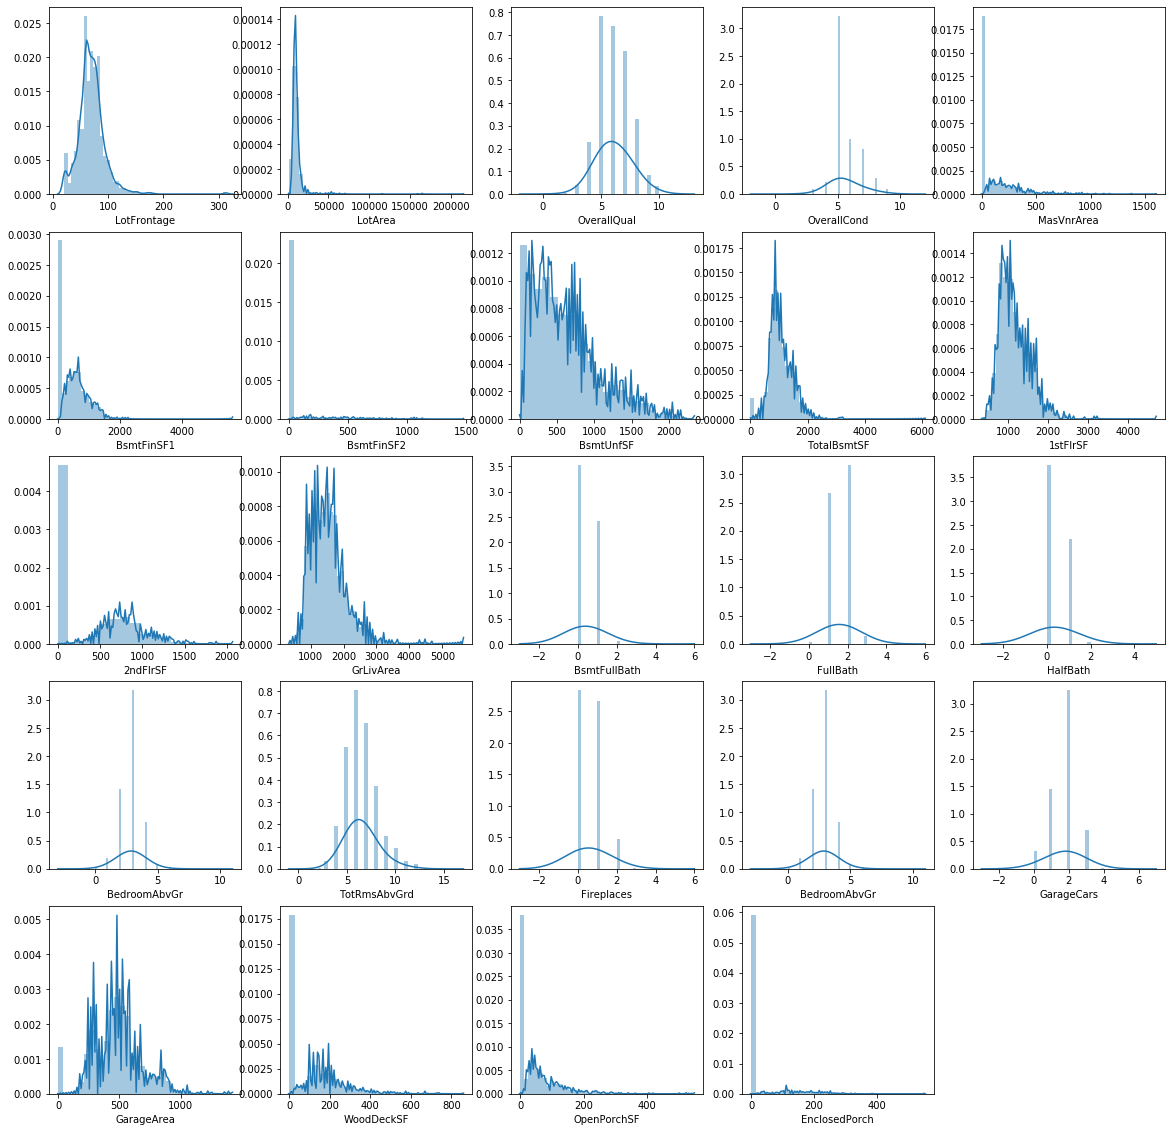

In [20]:
# Visualizing numerical variables
plt.figure(figsize=(20, 20))
plt.subplot(5,5,1)
sns.distplot(house['LotFrontage'])
plt.subplot(5,5,2)
sns.distplot(house['LotArea'],kde_kws = {'bw' : 1})
plt.subplot(5,5,3)
sns.distplot(house['OverallQual'],kde_kws = {'bw' : 1})
plt.subplot(5,5,4)
sns.distplot(house['OverallCond'],kde_kws = {'bw' : 1})
plt.subplot(5,5,5)
sns.distplot(house['MasVnrArea'],kde_kws = {'bw' : 1})
plt.subplot(5,5,6)
sns.distplot(house['BsmtFinSF1'],kde_kws = {'bw' : 1})
plt.subplot(5,5,7)
sns.distplot(house['BsmtFinSF2'],kde_kws = {'bw' : 1})
plt.subplot(5,5,8)
sns.distplot(house['BsmtUnfSF'],kde_kws = {'bw' : 1})
plt.subplot(5,5,9)
sns.distplot(house['TotalBsmtSF'],kde_kws = {'bw' : 1})
plt.subplot(5,5,10)
sns.distplot(house['1stFlrSF'],kde_kws = {'bw' : 1})
plt.subplot(5,5,11)
sns.distplot(house['2ndFlrSF'],kde_kws = {'bw' : 1})
plt.subplot(5,5,12)
sns.distplot(house['GrLivArea'],kde_kws = {'bw' : 1})
plt.subplot(5,5,13)
sns.distplot(house['BsmtFullBath'],kde_kws = {'bw' : 1})
plt.subplot(5,5,14)
sns.distplot(house['FullBath'],kde_kws = {'bw' : 1})
plt.subplot(5,5,15)
sns.distplot(house['HalfBath'],kde_kws = {'bw' : 1})
plt.subplot(5,5,16)
sns.distplot(house['BedroomAbvGr'],kde_kws = {'bw' : 1})
plt.subplot(5,5,17)
sns.distplot(house['TotRmsAbvGrd'],kde_kws = {'bw' : 1})
plt.subplot(5,5,18)
sns.distplot(house['Fireplaces'],kde_kws = {'bw' : 1})
plt.subplot(5,5,19)
sns.distplot(house['BedroomAbvGr'],kde_kws = {'bw' : 1})
plt.subplot(5,5,20)
sns.distplot(house['GarageCars'],kde_kws = {'bw' : 1})
plt.subplot(5,5,21)
sns.distplot(house['GarageArea'],kde_kws = {'bw' : 1})
plt.subplot(5,5,22)
sns.distplot(house['WoodDeckSF'],kde_kws = {'bw' : 1})
plt.subplot(5,5,23)
sns.distplot(house['OpenPorchSF'],kde_kws = {'bw' : 1})
plt.subplot(5,5,24)
sns.distplot(house['EnclosedPorch'],kde_kws = {'bw' : 1})
plt.show()

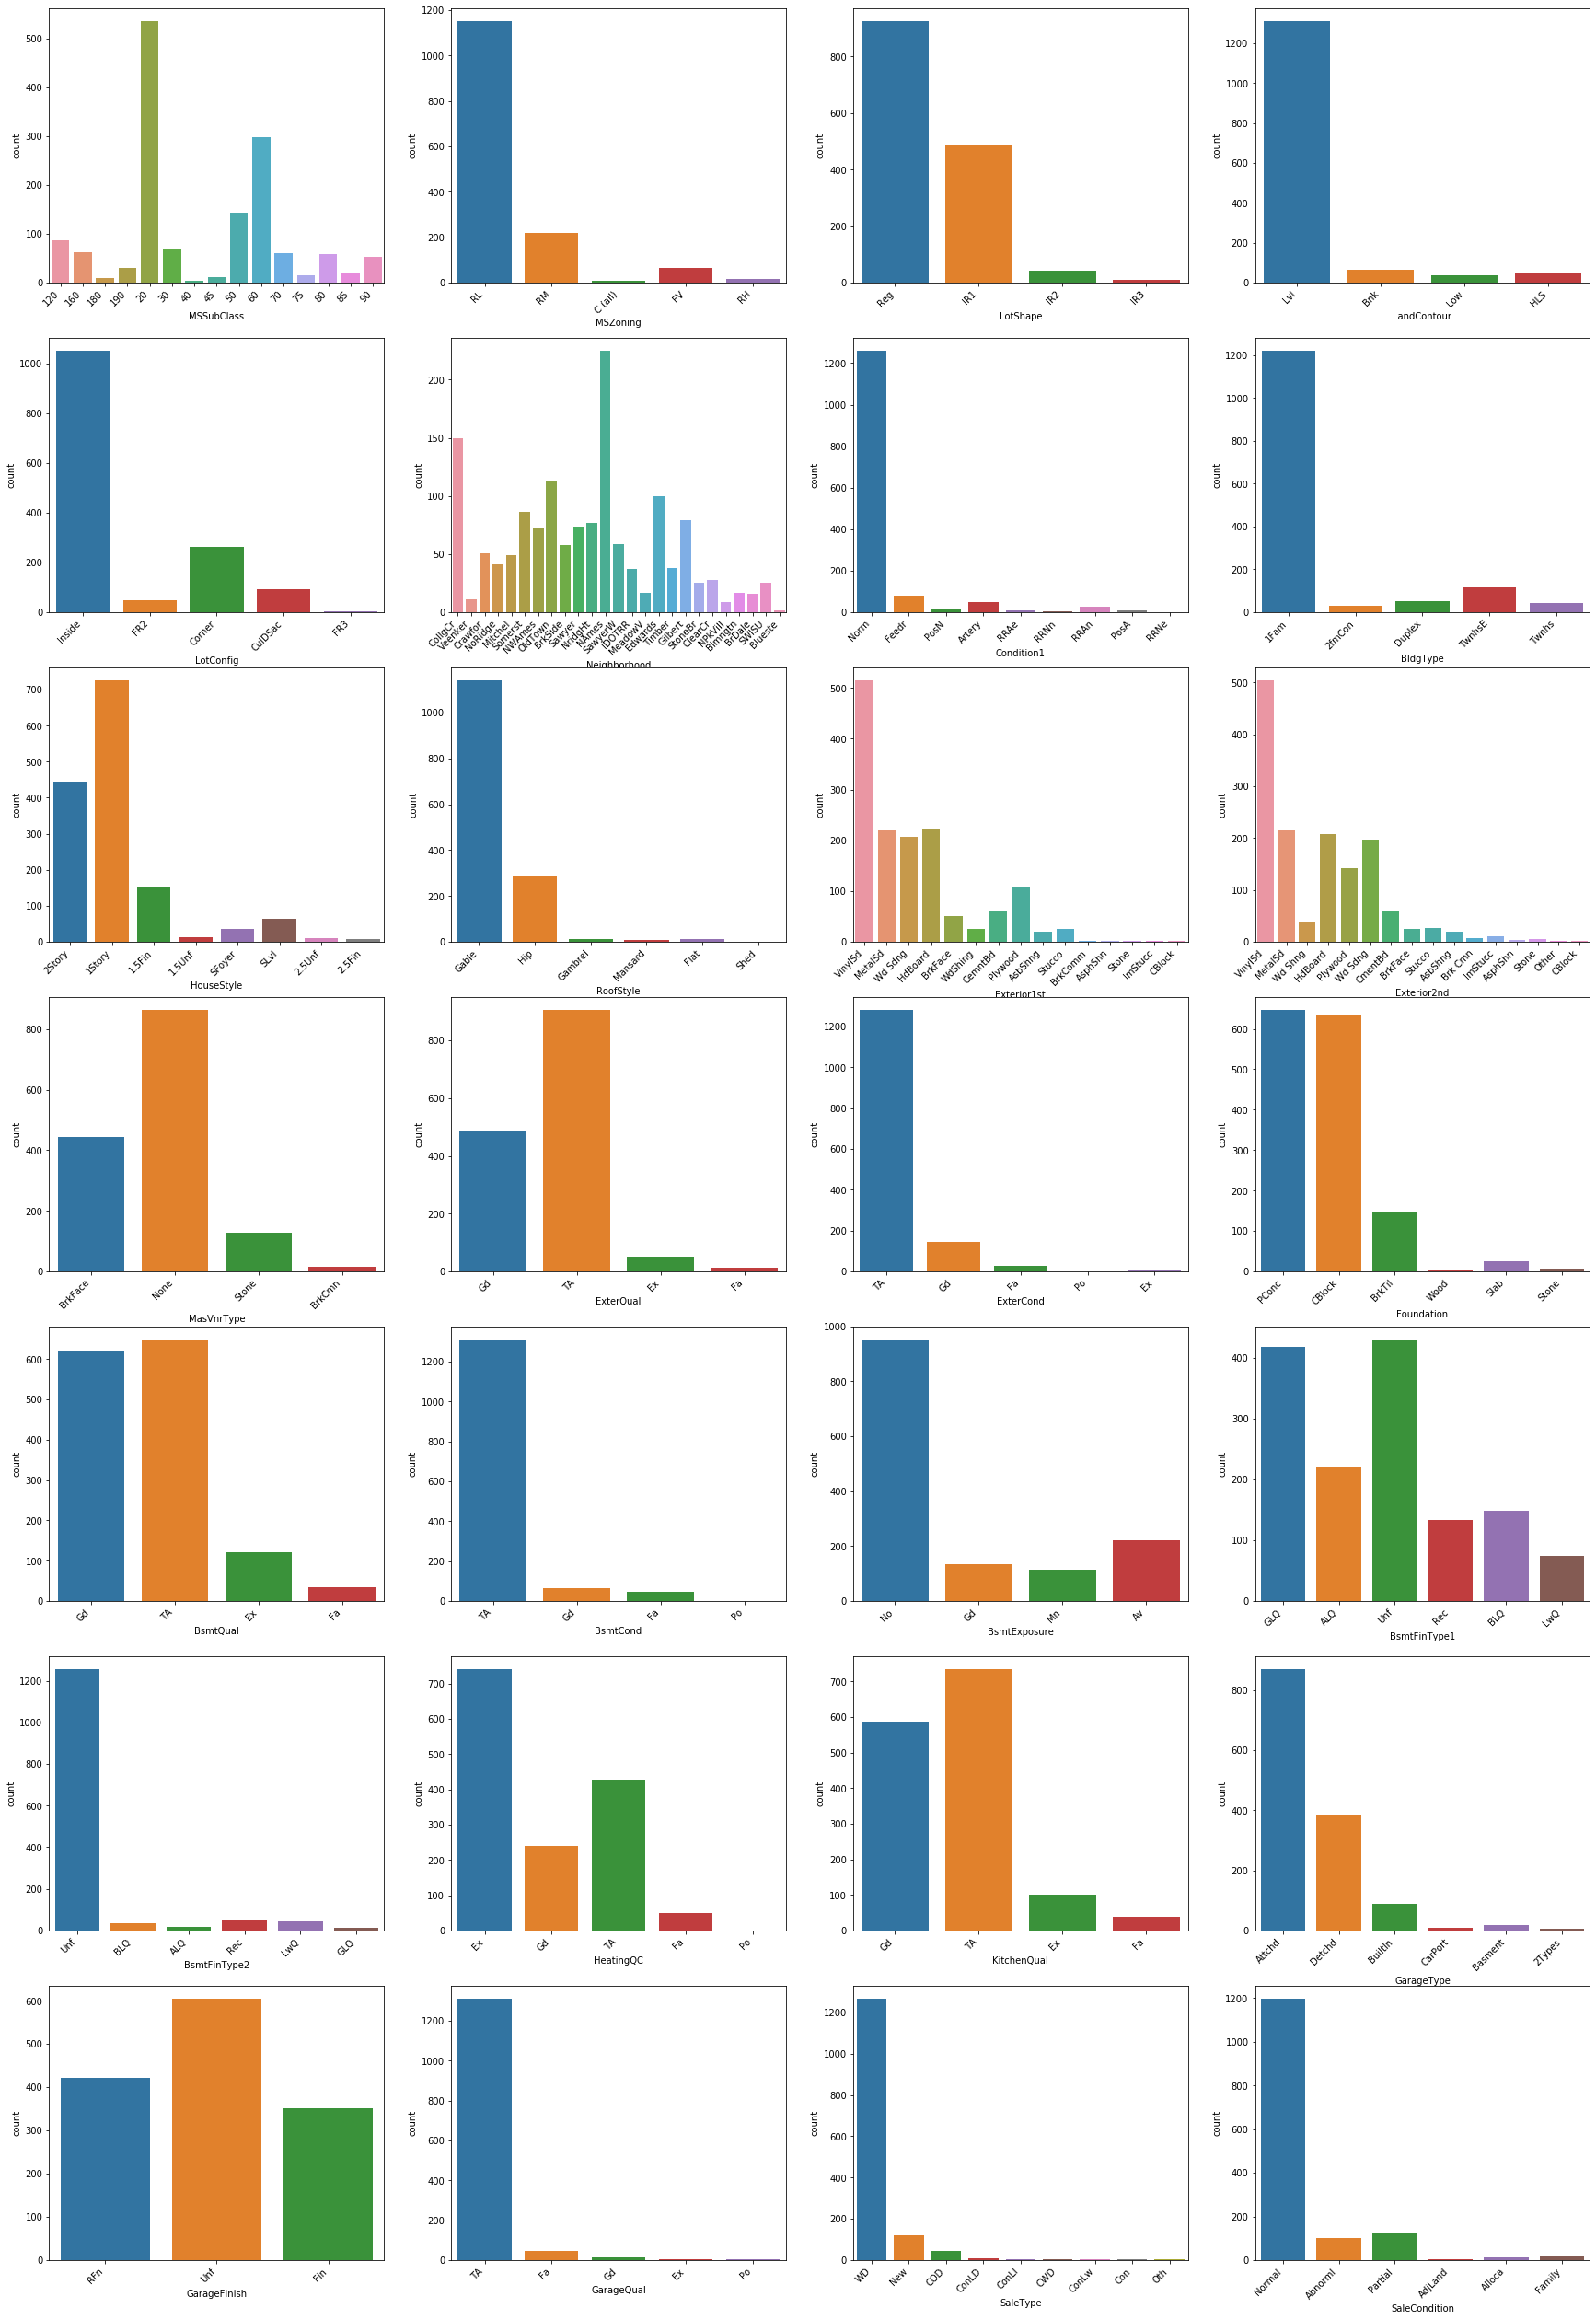

In [21]:
#Visualising continuous variables
#MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,
#Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,
#KitchenQual,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition
plt.figure(figsize=(30, 45))
plt.subplot(7,4,1)
sns.countplot(x = 'MSSubClass', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,2)
sns.countplot(x = 'MSZoning', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,3)
sns.countplot(x = 'LotShape', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,4)
sns.countplot(x = 'LandContour', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,5)
sns.countplot(x = 'LotConfig', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,6)
sns.countplot(x = 'Neighborhood', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,7)
sns.countplot(x = 'Condition1', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,8)
sns.countplot(x = 'BldgType', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,9)
sns.countplot(x = 'HouseStyle', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,10)
sns.countplot(x = 'RoofStyle', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,11)
sns.countplot(x = 'Exterior1st', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,12)
sns.countplot(x = 'Exterior2nd', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,13)
sns.countplot(x = 'MasVnrType', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,14)
sns.countplot(x = 'ExterQual', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,15)
sns.countplot(x = 'ExterCond', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,16)
sns.countplot(x = 'Foundation', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,17)
sns.countplot(x = 'BsmtQual', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,18)
sns.countplot(x = 'BsmtCond', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,19)
sns.countplot(x = 'BsmtExposure', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,20)
sns.countplot(x = 'BsmtFinType1', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,21)
sns.countplot(x = 'BsmtFinType2', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,22)
sns.countplot(x = 'HeatingQC', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,23)
sns.countplot(x = 'KitchenQual', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,24)
sns.countplot(x = 'GarageType', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,25)
sns.countplot(x = 'GarageFinish', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,26)
sns.countplot(x = 'GarageQual', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,27)
sns.countplot(x = 'SaleType', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.subplot(7,4,28)
sns.countplot(x = 'SaleCondition', data = house)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize=10)
plt.show()

In [22]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450            7            5       196.0         706   
1   2         80.0     9600            6            8         0.0         978   
2   3         68.0    11250            7            5       162.0         486   
3   4         60.0     9550            7            5         0.0         216   
4   5         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0           0        150          856       856       854       1710   
1           0        284         1262      1262         0       1262   
2           0        434          920       920       866       1786   
3           0        540          756       961       756       1717   
4           0        490         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  \
0             1         2         1             3             8           0   
1             0         2         0             3             6           1   
2             1         2         1             3             6           1   
3             1         1         0             3             7           1   
4             1         2         1             4             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice  \
0           2         548           0           61              0     208500   
1           2         460         298            0              0     181500   
2           2         608           0           42              0     223500   
3           3         642           0           35            272     140000   
4           3         836         192           84              0     250000   

   AgeBuilt  
0        18  
1        45  
2        20  
3       106  
4        21

In [23]:
# dropping Id,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
house_numeric = house_numeric.drop('Id', axis=1)
house_numeric.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0           0        150          856       856       854       1710   
1           0        284         1262      1262         0       1262   
2           0        434          920       920       866       1786   
3           0        540          756       961       756       1717   
4           0        490         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  \
0             1         2         1             3             8           0   
1             0         2         0             3             6           1   
2             1         2         1             3             6           1   
3             1         1         0             3             7           1   
4             1         2         1             4             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice  \
0           2         548           0           61              0     208500   
1           2         460         298            0              0     181500   
2           2         608           0           42              0     223500   
3           3         642           0           35            272     140000   
4           3         836         192           84              0     250000   

   AgeBuilt  
0        18  
1        45  
2        20  
3       106  
4        21

In [24]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1452 non-null   object 
 18  MasVnrAr

In [25]:
# correlation matrix
cor = house_numeric.corr()
cor

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
LotFrontage       1.000000  0.426095     0.251646    -0.059213    0.193458   
LotArea           0.426095  1.000000     0.105806    -0.005636    0.104160   
OverallQual       0.251646  0.105806     1.000000    -0.091932    0.411876   
OverallCond      -0.059213 -0.005636    -0.091932     1.000000   -0.128101   
MasVnrArea        0.193458  0.104160     0.411876    -0.128101    1.000000   
BsmtFinSF1        0.233633  0.214103     0.239666    -0.046231    0.264736   
BsmtFinSF2        0.049900  0.111170    -0.059119     0.040229   -0.072319   
BsmtUnfSF         0.132644 -0.002618     0.308159    -0.136841    0.114442   
TotalBsmtSF       0.392075  0.260833     0.537808    -0.171098    0.363936   
1stFlrSF          0.457181  0.299475     0.476224    -0.144203    0.344501   
2ndFlrSF          0.080177  0.050986     0.295493     0.028942    0.174561   
GrLivArea         0.402797  0.263116     0.593007    -0.079686    0.390857   
BsmtFullBath      0.100949  0.158155     0.111098    -0.054942    0.085310   
FullBath          0.198769  0.126031     0.550600    -0.194149    0.276833   
HalfBath          0.053532  0.014259     0.273458    -0.060769    0.201444   
BedroomAbvGr      0.263170  0.119690     0.101676     0.012980    0.102821   
TotRmsAbvGrd      0.352096  0.190015     0.427452    -0.057583    0.280682   
Fireplaces        0.266639  0.271364     0.396765    -0.023820    0.249070   
GarageCars        0.285691  0.154871     0.600671    -0.185758    0.364204   
GarageArea        0.344997  0.180403     0.562022    -0.151521    0.373066   
WoodDeckSF        0.088521  0.171698     0.238923    -0.003334    0.159718   
OpenPorchSF       0.151972  0.084774     0.308819    -0.032589    0.125703   
EnclosedPorch     0.010700 -0.018340    -0.113937     0.070356   -0.110204   
SalePrice         0.351799  0.263843     0.790982    -0.077856    0.477493   
AgeBuilt         -0.123349 -0.014228    -0.572323     0.375983   -0.315707   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
LotFrontage      0.233633    0.049900   0.132644     0.392075  0.457181   
LotArea          0.214103    0.111170  -0.002618     0.260833  0.299475   
OverallQual      0.239666   -0.059119   0.308159     0.537808  0.476224   
OverallCond     -0.046231    0.040229  -0.136841    -0.171098 -0.144203   
MasVnrArea       0.264736   -0.072319   0.114442     0.363936  0.344501   
BsmtFinSF1       1.000000   -0.050117  -0.495251     0.522396  0.445863   
BsmtFinSF2      -0.050117    1.000000  -0.209294     0.104810  0.097117   
BsmtUnfSF       -0.495251   -0.209294   1.000000     0.415360  0.317987   
TotalBsmtSF      0.522396    0.104810   0.415360     1.000000  0.819530   
1stFlrSF         0.445863    0.097117   0.317987     0.819530  1.000000   
2ndFlrSF        -0.137079   -0.099260   0.004469    -0.174512 -0.202646   
GrLivArea        0.208171   -0.009640   0.240257     0.454868  0.566024   
BsmtFullBath     0.649212    0.158678  -0.422900     0.307351  0.244671   
FullBath         0.058543   -0.076444   0.288886     0.323722  0.380637   
HalfBath         0.004262   -0.032148  -0.041118    -0.048804 -0.119916   
BedroomAbvGr    -0.107355   -0.015728   0.166643     0.050450  0.127401   
TotRmsAbvGrd     0.044316   -0.035227   0.250647     0.285573  0.409516   
Fireplaces       0.260011    0.046921   0.051575     0.339519  0.410531   
GarageCars       0.224054   -0.038264   0.214175     0.434585  0.439317   
GarageArea       0.296970   -0.018227   0.183303     0.486665  0.489782   
WoodDeckSF       0.204306    0.067898  -0.005316     0.232019  0.235459   
OpenPorchSF      0.111761    0.003093   0.129005     0.247264  0.211671   
EnclosedPorch   -0.102303    0.036543  -0.002538    -0.095478 -0.065292   
SalePrice        0.386420   -0.011378   0.214479     0.613581  0.605852   
AgeBuilt        -0.249503    0.049107  -0.149040    -0.391452 -0.281986   

               2ndFlrSF  GrLivArea 

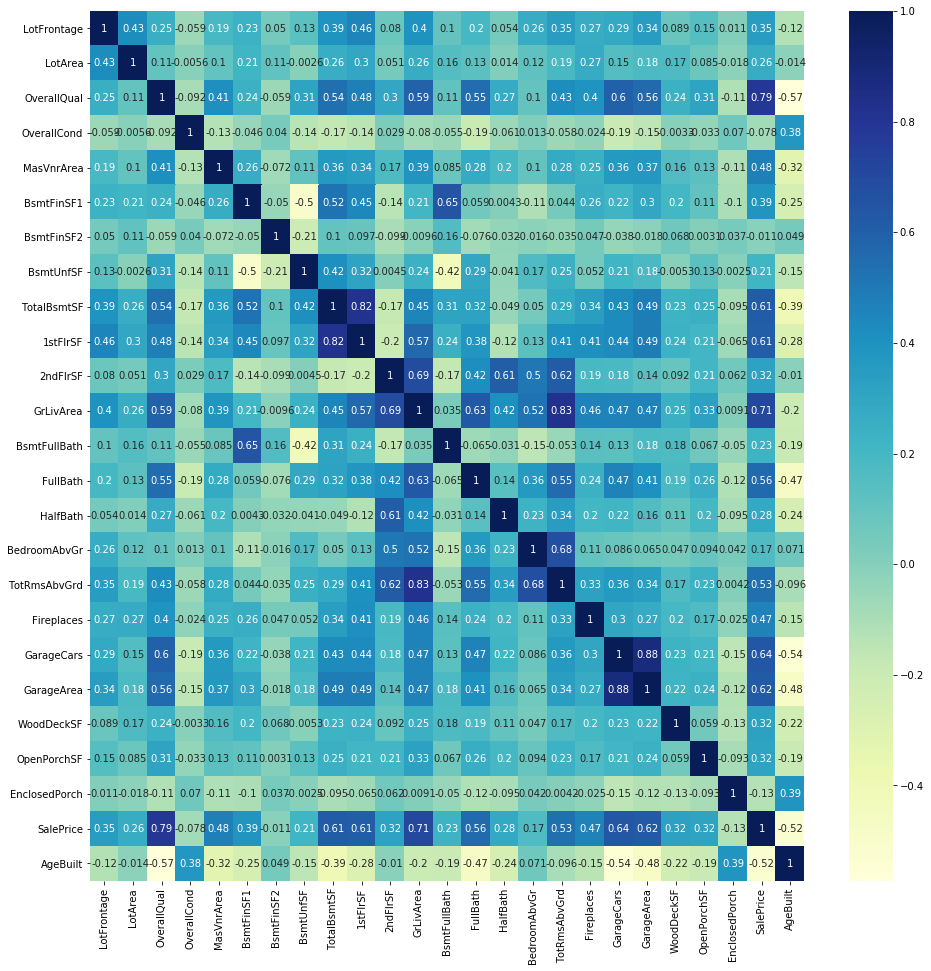

In [26]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


#### Computing the missing values 

In [27]:
round(100*(house.isnull().sum())/len(house), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
LotShape          0.00
LandContour       0.00
LotConfig         0.00
Neighborhood      0.00
Condition1        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
RoofStyle         0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
HeatingQC         0.00
1stFlrSF          0.00
2ndFlrSF          0.00
GrLivArea         0.00
BsmtFullBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Fireplaces        0.00
GarageType        5.55
GarageFinis

In [28]:
house[house['LotFrontage'].isna()==True]

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
7        8         60       RL          NaN    10382      IR1         Lvl   
12      13         20       RL          NaN    12968      IR2         Lvl   
14      15         20       RL          NaN    10920      IR1         Lvl   
16      17         20       RL          NaN    11241      IR1         Lvl   
24      25         20       RL          NaN     8246      IR1         Lvl   
31      32         20       RL          NaN     8544      IR1         Lvl   
42      43         85       RL          NaN     9180      IR1         Lvl   
43      44         20       RL          NaN     9200      IR1         Lvl   
50      51         60       RL          NaN    13869      IR2         Lvl   
64      65         60       RL          NaN     9375      Reg         Lvl   
66      67         20       RL          NaN    19900      Reg         Lvl   
76      77         20       RL          NaN     8475      IR1         Lvl   
84      85         80       RL          NaN     8530      IR1         Lvl   
95      96         60       RL          NaN     9765      IR2         Lvl   
100    101         20       RL          NaN    10603      IR1         Lvl   
104    105         50       RM          NaN     7758      Reg         Lvl   
111    112         80       RL          NaN     7750      IR1         Lvl   
113    114         20       RL          NaN    21000      Reg         Bnk   
116    117         20       RL          NaN    11616      Reg         Lvl   
120    121         80       RL          NaN    21453      IR1         Low   
126    127        120       RL          NaN     4928      IR1         Lvl   
131    132         60       RL          NaN    12224      IR1         Lvl   
133    134         20       RL          NaN     6853      IR1         Lvl   
136    137         20       RL          NaN    10355      IR1         Lvl   
147    148         60       RL          NaN     9505      IR1         Lvl   
149    150         50       RM          NaN     6240      Reg         Lvl   
152    153         60       RL          NaN    14803      IR1         Lvl   
153    154         20       RL          NaN    13500      Reg         Lvl   
160    161         20       RL          NaN    11120      IR1         Lvl   
166    167         20       RL          NaN    10708      IR1         Lvl   
169    170         20       RL          NaN    16669      IR1         Lvl   
170    171         50       RM          NaN    12358      IR1         Lvl   
177    178         50       RL          NaN    13650      Reg         Lvl   
180    181        160       FV          NaN     2117      Reg         Lvl   
186    187         80       RL          NaN     9947      IR1         Lvl   
191    192         60       RL          NaN     7472      IR1         Lvl   
203    204        120       RM          NaN     4438      Reg         Lvl   
207    208         20       RL          NaN    12493      IR1         Lvl   
208    209         60       RL          NaN    14364      IR1         Low   
214    215         60       RL          NaN    10900      IR1         Lvl   
218    219         50       RL          NaN    15660      IR1         Lvl   
221    222         60       RL          NaN     8068      IR1         Lvl   
234    235         60       RL          NaN     7851      Reg         Lvl   
237    238         60       RL          NaN     9453      IR1         Lvl   
244    245         60       RL          NaN     8880      IR1         Lvl   
249    250         50       RL          NaN   159000      IR2         Low   
269    270         20       RL          NaN     7917      IR1         Lvl   
287    288         20       RL          NaN     8125      IR1         Lvl   
288    289         20       RL          NaN     9819      IR1         Lvl   
293    294         60       RL          NaN    16659      IR1         Lvl   
307    308         50       RM          NaN     7920      IR1         Lvl   
308 

In [29]:
lf=house['LotFrontage'].mean()
#filling the na values with mean
house['LotFrontage'].fillna(lf,inplace=True)
house[house['LotFrontage'].isna()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, SaleType, SaleCondition, SalePrice, AgeBuilt]
Index: []

In [30]:
house[house['MasVnrType'].isna()==True]

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
234    235         60       RL    70.049958     7851      Reg         Lvl   
529    530         20       RL    70.049958    32668      IR1         Lvl   
650    651         60       FV    65.000000     8125      Reg         Lvl   
936    937         20       RL    67.000000    10083      Reg         Lvl   
973    974         20       FV    95.000000    11639      Reg         Lvl   
977    978        120       FV    35.000000     4274      IR1         Lvl   
1243  1244         20       RL   107.000000    13891      Reg         Lvl   
1278  1279         60       RL    75.000000     9473      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
234     Inside      Gilbert       Norm     1Fam     2Story            6   
529    CulDSac      Crawfor       Norm     1Fam     1Story            6   
650     Inside      Somerst       Norm     1Fam     2Story            7   
936     Inside      SawyerW       Norm     1Fam     1Story            7   
973     Corner      Somerst       Norm     1Fam     1Story            7   
977     Inside      Somerst       Norm   TwnhsE     1Story            7   
1243    Inside      NridgHt       Norm     1Fam     1Story           10   
1278    Inside      CollgCr       Norm     1Fam     2Story            8   

      OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
234             5     Gable     VinylSd     VinylSd        NaN         NaN   
529             3       Hip     Wd Sdng       Stone        NaN         NaN   
650             6     Gable     CemntBd     CmentBd        NaN         NaN   
936             5     Gable     VinylSd     VinylSd        NaN         NaN   
973             5     Gable     CemntBd     CmentBd        NaN         NaN   
977             5     Gable     VinylSd     VinylSd        NaN         NaN   
1243            5     Gable     VinylSd     VinylSd        NaN         NaN   
1278            5     Gable     VinylSd     VinylSd        NaN         NaN   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
234         Gd        TA      PConc       Gd       TA           No   
529         Gd        TA      PConc       TA       TA           No   
650         Gd        TA      PConc       Gd       TA           No   
936         Gd        TA      PConc       Gd       TA           No   
973         Gd        TA      PConc       Gd       TA           No   
977         Gd        TA      PConc       Gd       TA           No   
1243        Ex        TA      PConc       Ex       Gd           Gd   
1278        Gd        TA      PConc       Gd       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
234           GLQ         625          Unf           0        235   
529           Rec        1219          Unf           0        816   
650           Unf           0          Unf           0        813   
936           GLQ         833          Unf           0        343   
973           Unf           0          Unf           0       1428   
977           GLQ        1106          Unf           0        135   
1243          GLQ        1386          Unf           0        690   
1278          GLQ         804          Unf           0        324   

      TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
234           860        Ex       860      1100       1960             1   
529          2035        TA      2515         0       2515             1   
650           813        Ex       822       843       1665             0   
936          1176        Ex      1200         0       1200             1   
973          1428        Ex      1428         0       1428             0   
977          1241        Ex      1241         0       1241             1   
1243         2076        Ex      2076         0       2076             1   
1278         1128        Ex      1128       903       2031             1  

In [31]:
house['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [32]:
mvt=house['MasVnrType'].mode()[0]
#filling the na values with mode
house['MasVnrType'].fillna(mvt,inplace=True)
house[house['MasVnrType'].isna()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, SaleType, SaleCondition, SalePrice, AgeBuilt]
Index: []

In [33]:
house[house['MasVnrArea'].isna()==True]

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
234    235         60       RL    70.049958     7851      Reg         Lvl   
529    530         20       RL    70.049958    32668      IR1         Lvl   
650    651         60       FV    65.000000     8125      Reg         Lvl   
936    937         20       RL    67.000000    10083      Reg         Lvl   
973    974         20       FV    95.000000    11639      Reg         Lvl   
977    978        120       FV    35.000000     4274      IR1         Lvl   
1243  1244         20       RL   107.000000    13891      Reg         Lvl   
1278  1279         60       RL    75.000000     9473      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
234     Inside      Gilbert       Norm     1Fam     2Story            6   
529    CulDSac      Crawfor       Norm     1Fam     1Story            6   
650     Inside      Somerst       Norm     1Fam     2Story            7   
936     Inside      SawyerW       Norm     1Fam     1Story            7   
973     Corner      Somerst       Norm     1Fam     1Story            7   
977     Inside      Somerst       Norm   TwnhsE     1Story            7   
1243    Inside      NridgHt       Norm     1Fam     1Story           10   
1278    Inside      CollgCr       Norm     1Fam     2Story            8   

      OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
234             5     Gable     VinylSd     VinylSd       None         NaN   
529             3       Hip     Wd Sdng       Stone       None         NaN   
650             6     Gable     CemntBd     CmentBd       None         NaN   
936             5     Gable     VinylSd     VinylSd       None         NaN   
973             5     Gable     CemntBd     CmentBd       None         NaN   
977             5     Gable     VinylSd     VinylSd       None         NaN   
1243            5     Gable     VinylSd     VinylSd       None         NaN   
1278            5     Gable     VinylSd     VinylSd       None         NaN   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
234         Gd        TA      PConc       Gd       TA           No   
529         Gd        TA      PConc       TA       TA           No   
650         Gd        TA      PConc       Gd       TA           No   
936         Gd        TA      PConc       Gd       TA           No   
973         Gd        TA      PConc       Gd       TA           No   
977         Gd        TA      PConc       Gd       TA           No   
1243        Ex        TA      PConc       Ex       Gd           Gd   
1278        Gd        TA      PConc       Gd       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
234           GLQ         625          Unf           0        235   
529           Rec        1219          Unf           0        816   
650           Unf           0          Unf           0        813   
936           GLQ         833          Unf           0        343   
973           Unf           0          Unf           0       1428   
977           GLQ        1106          Unf           0        135   
1243          GLQ        1386          Unf           0        690   
1278          GLQ         804          Unf           0        324   

      TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
234           860        Ex       860      1100       1960             1   
529          2035        TA      2515         0       2515             1   
650           813        Ex       822       843       1665             0   
936          1176        Ex      1200         0       1200             1   
973          1428        Ex      1428         0       1428             0   
977          1241        Ex      1241         0       1241             1   
1243         2076        Ex      2076         0       2076             1   
1278         1128        Ex      1128       903       2031             1  

In [34]:
mva=house['MasVnrArea'].mean()
#filling the na values with mean
house['MasVnrArea'].fillna(mva,inplace=True)
house[house['MasVnrArea'].isna()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, SaleType, SaleCondition, SalePrice, AgeBuilt]
Index: []

In [35]:
round(100*(house.isnull().sum())/len(house), 2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
LotShape         0.00
LandContour      0.00
LotConfig        0.00
Neighborhood     0.00
Condition1       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
RoofStyle        0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
HeatingQC        0.00
1stFlrSF         0.00
2ndFlrSF         0.00
GrLivArea        0.00
BsmtFullBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
Fireplaces       0.00
GarageType       5.55
GarageFinish     5.55
GarageCars       0.00
GarageArea

In [36]:
#Computing the No basement columns with the appropriate value since it won't be appropriate to compute those with Mean,Median or Mode
#BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,GarageQual
house[house['BsmtQual'].isna()==True]

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
17      18         90       RL    72.000000    10791      Reg         Lvl   
39      40         90       RL    65.000000     6040      Reg         Lvl   
90      91         20       RL    60.000000     7200      Reg         Lvl   
102    103         90       RL    64.000000     7018      Reg         Bnk   
156    157         20       RL    60.000000     7200      Reg         Lvl   
182    183         20       RL    60.000000     9060      Reg         Lvl   
259    260         20       RM    70.000000    12702      Reg         Lvl   
342    343         90       RL    70.049958     8544      Reg         Lvl   
362    363         85       RL    64.000000     7301      Reg         Lvl   
371    372         50       RL    80.000000    17120      Reg         Lvl   
392    393         20       RL    70.049958     8339      IR1         Lvl   
520    521        190       RL    60.000000    10800      Reg         Lvl   
532    533         20       RL    60.000000     7200      Reg         Lvl   
533    534         20       RL    50.000000     5000      Reg         Low   
553    554         20       RL    67.000000     8777      Reg         Lvl   
646    647         20       RL    60.000000     7200      Reg         Lvl   
705    706        190       RM    70.000000     5600      Reg         Lvl   
736    737         90       RL    60.000000     8544      Reg         Lvl   
749    750         50       RL    50.000000     8405      Reg         Lvl   
778    779         90       RH    60.000000     8400      Reg         Lvl   
868    869         60       RL    70.049958    14762      IR2         Lvl   
894    895         90       RL    64.000000     7018      Reg         Bnk   
897    898         90       RL    64.000000     7018      Reg         Lvl   
984    985         90       RL    75.000000    10125      Reg         Lvl   
1000  1001         20       RL    74.000000    10206      Reg         Lvl   
1011  1012         90       RL    75.000000     9825      Reg         Lvl   
1035  1036         20       RL    70.049958    11500      IR1         Lvl   
1045  1046         20       RL    70.049958    13680      IR1         Lvl   
1048  1049         20       RL   100.000000    21750      Reg         Lvl   
1049  1050         20       RL    60.000000    11100      Reg         Low   
1090  1091         90       RL    60.000000     8544      Reg         Lvl   
1179  1180         20       RL    77.000000     8335      Reg         Lvl   
1216  1217         90       RM    68.000000     8930      Reg         Lvl   
1218  1219         50       RM    52.000000     6240      Reg         Lvl   
1232  1233         90       RL    70.000000     9842      Reg         Lvl   
1321  1322         20       RL    70.049958     6627      IR1         Lvl   
1412  1413         90       RL    60.000000     7200      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
17      Inside       Sawyer       Norm   Duplex     1Story            4   
39      Inside      Edwards       Norm   Duplex     1Story            4   
90      Inside        NAmes       Norm     1Fam     1Story            4   
102     Inside      SawyerW       Norm   Duplex     1Story            5   
156     Inside        NAmes       Norm     1Fam     1Story            5   
182     Inside      Edwards     Artery     1Fam     1Story            5   
259     Inside      OldTown       Norm     1Fam     1Story            5   
342     Inside        NAmes       Norm   Duplex     1Story            3   
362     Corner      Edwards       Norm     1Fam     SFoyer            7   
371     Inside      ClearCr      Feedr     1Fam     1.5Fin            4   
392     Inside        NAmes       Norm     1Fam     1Story            5   
520     Inside      OldTown       Norm   2fmCon     2Story            4   
532     Inside        NAmes       Norm     1Fam     1Story            5   
533     Inside      BrkSide    

In [37]:
#filling the na values with 'NB' which implies 'no basement'
house['BsmtQual'].fillna('NB',inplace=True)
house[house['BsmtQual'].isna()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, SaleType, SaleCondition, SalePrice, AgeBuilt]
Index: []

In [38]:
house[house['BsmtCond'].isna()==True]

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
17      18         90       RL    72.000000    10791      Reg         Lvl   
39      40         90       RL    65.000000     6040      Reg         Lvl   
90      91         20       RL    60.000000     7200      Reg         Lvl   
102    103         90       RL    64.000000     7018      Reg         Bnk   
156    157         20       RL    60.000000     7200      Reg         Lvl   
182    183         20       RL    60.000000     9060      Reg         Lvl   
259    260         20       RM    70.000000    12702      Reg         Lvl   
342    343         90       RL    70.049958     8544      Reg         Lvl   
362    363         85       RL    64.000000     7301      Reg         Lvl   
371    372         50       RL    80.000000    17120      Reg         Lvl   
392    393         20       RL    70.049958     8339      IR1         Lvl   
520    521        190       RL    60.000000    10800      Reg         Lvl   
532    533         20       RL    60.000000     7200      Reg         Lvl   
533    534         20       RL    50.000000     5000      Reg         Low   
553    554         20       RL    67.000000     8777      Reg         Lvl   
646    647         20       RL    60.000000     7200      Reg         Lvl   
705    706        190       RM    70.000000     5600      Reg         Lvl   
736    737         90       RL    60.000000     8544      Reg         Lvl   
749    750         50       RL    50.000000     8405      Reg         Lvl   
778    779         90       RH    60.000000     8400      Reg         Lvl   
868    869         60       RL    70.049958    14762      IR2         Lvl   
894    895         90       RL    64.000000     7018      Reg         Bnk   
897    898         90       RL    64.000000     7018      Reg         Lvl   
984    985         90       RL    75.000000    10125      Reg         Lvl   
1000  1001         20       RL    74.000000    10206      Reg         Lvl   
1011  1012         90       RL    75.000000     9825      Reg         Lvl   
1035  1036         20       RL    70.049958    11500      IR1         Lvl   
1045  1046         20       RL    70.049958    13680      IR1         Lvl   
1048  1049         20       RL   100.000000    21750      Reg         Lvl   
1049  1050         20       RL    60.000000    11100      Reg         Low   
1090  1091         90       RL    60.000000     8544      Reg         Lvl   
1179  1180         20       RL    77.000000     8335      Reg         Lvl   
1216  1217         90       RM    68.000000     8930      Reg         Lvl   
1218  1219         50       RM    52.000000     6240      Reg         Lvl   
1232  1233         90       RL    70.000000     9842      Reg         Lvl   
1321  1322         20       RL    70.049958     6627      IR1         Lvl   
1412  1413         90       RL    60.000000     7200      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
17      Inside       Sawyer       Norm   Duplex     1Story            4   
39      Inside      Edwards       Norm   Duplex     1Story            4   
90      Inside        NAmes       Norm     1Fam     1Story            4   
102     Inside      SawyerW       Norm   Duplex     1Story            5   
156     Inside        NAmes       Norm     1Fam     1Story            5   
182     Inside      Edwards     Artery     1Fam     1Story            5   
259     Inside      OldTown       Norm     1Fam     1Story            5   
342     Inside        NAmes       Norm   Duplex     1Story            3   
362     Corner      Edwards       Norm     1Fam     SFoyer            7   
371     Inside      ClearCr      Feedr     1Fam     1.5Fin            4   
392     Inside        NAmes       Norm     1Fam     1Story            5   
520     Inside      OldTown       Norm   2fmCon     2Story            4   
532     Inside        NAmes       Norm     1Fam     1Story            5   
533     Inside      BrkSide    

In [39]:
#filling the na values with 'NB' which implies 'no basement'
house['BsmtCond'].fillna('NB',inplace=True)
house[house['BsmtCond'].isna()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, SaleType, SaleCondition, SalePrice, AgeBuilt]
Index: []

In [40]:
house[house['BsmtExposure'].isna()==True]

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
17      18         90       RL    72.000000    10791      Reg         Lvl   
39      40         90       RL    65.000000     6040      Reg         Lvl   
90      91         20       RL    60.000000     7200      Reg         Lvl   
102    103         90       RL    64.000000     7018      Reg         Bnk   
156    157         20       RL    60.000000     7200      Reg         Lvl   
182    183         20       RL    60.000000     9060      Reg         Lvl   
259    260         20       RM    70.000000    12702      Reg         Lvl   
342    343         90       RL    70.049958     8544      Reg         Lvl   
362    363         85       RL    64.000000     7301      Reg         Lvl   
371    372         50       RL    80.000000    17120      Reg         Lvl   
392    393         20       RL    70.049958     8339      IR1         Lvl   
520    521        190       RL    60.000000    10800      Reg         Lvl   
532    533         20       RL    60.000000     7200      Reg         Lvl   
533    534         20       RL    50.000000     5000      Reg         Low   
553    554         20       RL    67.000000     8777      Reg         Lvl   
646    647         20       RL    60.000000     7200      Reg         Lvl   
705    706        190       RM    70.000000     5600      Reg         Lvl   
736    737         90       RL    60.000000     8544      Reg         Lvl   
749    750         50       RL    50.000000     8405      Reg         Lvl   
778    779         90       RH    60.000000     8400      Reg         Lvl   
868    869         60       RL    70.049958    14762      IR2         Lvl   
894    895         90       RL    64.000000     7018      Reg         Bnk   
897    898         90       RL    64.000000     7018      Reg         Lvl   
948    949         60       RL    65.000000    14006      IR1         Lvl   
984    985         90       RL    75.000000    10125      Reg         Lvl   
1000  1001         20       RL    74.000000    10206      Reg         Lvl   
1011  1012         90       RL    75.000000     9825      Reg         Lvl   
1035  1036         20       RL    70.049958    11500      IR1         Lvl   
1045  1046         20       RL    70.049958    13680      IR1         Lvl   
1048  1049         20       RL   100.000000    21750      Reg         Lvl   
1049  1050         20       RL    60.000000    11100      Reg         Low   
1090  1091         90       RL    60.000000     8544      Reg         Lvl   
1179  1180         20       RL    77.000000     8335      Reg         Lvl   
1216  1217         90       RM    68.000000     8930      Reg         Lvl   
1218  1219         50       RM    52.000000     6240      Reg         Lvl   
1232  1233         90       RL    70.000000     9842      Reg         Lvl   
1321  1322         20       RL    70.049958     6627      IR1         Lvl   
1412  1413         90       RL    60.000000     7200      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
17      Inside       Sawyer       Norm   Duplex     1Story            4   
39      Inside      Edwards       Norm   Duplex     1Story            4   
90      Inside        NAmes       Norm     1Fam     1Story            4   
102     Inside      SawyerW       Norm   Duplex     1Story            5   
156     Inside        NAmes       Norm     1Fam     1Story            5   
182     Inside      Edwards     Artery     1Fam     1Story            5   
259     Inside      OldTown       Norm     1Fam     1Story            5   
342     Inside        NAmes       Norm   Duplex     1Story            3   
362     Corner      Edwards       Norm     1Fam     SFoyer            7   
371     Inside      ClearCr      Feedr     1Fam     1.5Fin            4   
392     Inside        NAmes       Norm     1Fam     1Story            5   
520     Inside      OldTown       Norm   2fmCon     2Story            4   
532     Inside        NAmes  

In [41]:
#filling the na values with 'NB' which implies 'no basement'
house['BsmtExposure'].fillna('NB',inplace=True)
house[house['BsmtExposure'].isna()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, SaleType, SaleCondition, SalePrice, AgeBuilt]
Index: []

In [42]:
house[house['BsmtFinType1'].isna()==True]

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
17      18         90       RL    72.000000    10791      Reg         Lvl   
39      40         90       RL    65.000000     6040      Reg         Lvl   
90      91         20       RL    60.000000     7200      Reg         Lvl   
102    103         90       RL    64.000000     7018      Reg         Bnk   
156    157         20       RL    60.000000     7200      Reg         Lvl   
182    183         20       RL    60.000000     9060      Reg         Lvl   
259    260         20       RM    70.000000    12702      Reg         Lvl   
342    343         90       RL    70.049958     8544      Reg         Lvl   
362    363         85       RL    64.000000     7301      Reg         Lvl   
371    372         50       RL    80.000000    17120      Reg         Lvl   
392    393         20       RL    70.049958     8339      IR1         Lvl   
520    521        190       RL    60.000000    10800      Reg         Lvl   
532    533         20       RL    60.000000     7200      Reg         Lvl   
533    534         20       RL    50.000000     5000      Reg         Low   
553    554         20       RL    67.000000     8777      Reg         Lvl   
646    647         20       RL    60.000000     7200      Reg         Lvl   
705    706        190       RM    70.000000     5600      Reg         Lvl   
736    737         90       RL    60.000000     8544      Reg         Lvl   
749    750         50       RL    50.000000     8405      Reg         Lvl   
778    779         90       RH    60.000000     8400      Reg         Lvl   
868    869         60       RL    70.049958    14762      IR2         Lvl   
894    895         90       RL    64.000000     7018      Reg         Bnk   
897    898         90       RL    64.000000     7018      Reg         Lvl   
984    985         90       RL    75.000000    10125      Reg         Lvl   
1000  1001         20       RL    74.000000    10206      Reg         Lvl   
1011  1012         90       RL    75.000000     9825      Reg         Lvl   
1035  1036         20       RL    70.049958    11500      IR1         Lvl   
1045  1046         20       RL    70.049958    13680      IR1         Lvl   
1048  1049         20       RL   100.000000    21750      Reg         Lvl   
1049  1050         20       RL    60.000000    11100      Reg         Low   
1090  1091         90       RL    60.000000     8544      Reg         Lvl   
1179  1180         20       RL    77.000000     8335      Reg         Lvl   
1216  1217         90       RM    68.000000     8930      Reg         Lvl   
1218  1219         50       RM    52.000000     6240      Reg         Lvl   
1232  1233         90       RL    70.000000     9842      Reg         Lvl   
1321  1322         20       RL    70.049958     6627      IR1         Lvl   
1412  1413         90       RL    60.000000     7200      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
17      Inside       Sawyer       Norm   Duplex     1Story            4   
39      Inside      Edwards       Norm   Duplex     1Story            4   
90      Inside        NAmes       Norm     1Fam     1Story            4   
102     Inside      SawyerW       Norm   Duplex     1Story            5   
156     Inside        NAmes       Norm     1Fam     1Story            5   
182     Inside      Edwards     Artery     1Fam     1Story            5   
259     Inside      OldTown       Norm     1Fam     1Story            5   
342     Inside        NAmes       Norm   Duplex     1Story            3   
362     Corner      Edwards       Norm     1Fam     SFoyer            7   
371     Inside      ClearCr      Feedr     1Fam     1.5Fin            4   
392     Inside        NAmes       Norm     1Fam     1Story            5   
520     Inside      OldTown       Norm   2fmCon     2Story            4   
532     Inside        NAmes       Norm     1Fam     1Story            5   
533     Inside      BrkSide    

In [43]:
#filling the na values with 'NB' which implies 'no basement'
house['BsmtFinType1'].fillna('NB',inplace=True)
house[house['BsmtFinType1'].isna()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, SaleType, SaleCondition, SalePrice, AgeBuilt]
Index: []

In [44]:
house[house['BsmtFinType2'].isna()==True]

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
17      18         90       RL    72.000000    10791      Reg         Lvl   
39      40         90       RL    65.000000     6040      Reg         Lvl   
90      91         20       RL    60.000000     7200      Reg         Lvl   
102    103         90       RL    64.000000     7018      Reg         Bnk   
156    157         20       RL    60.000000     7200      Reg         Lvl   
182    183         20       RL    60.000000     9060      Reg         Lvl   
259    260         20       RM    70.000000    12702      Reg         Lvl   
332    333         20       RL    85.000000    10655      IR1         Lvl   
342    343         90       RL    70.049958     8544      Reg         Lvl   
362    363         85       RL    64.000000     7301      Reg         Lvl   
371    372         50       RL    80.000000    17120      Reg         Lvl   
392    393         20       RL    70.049958     8339      IR1         Lvl   
520    521        190       RL    60.000000    10800      Reg         Lvl   
532    533         20       RL    60.000000     7200      Reg         Lvl   
533    534         20       RL    50.000000     5000      Reg         Low   
553    554         20       RL    67.000000     8777      Reg         Lvl   
646    647         20       RL    60.000000     7200      Reg         Lvl   
705    706        190       RM    70.000000     5600      Reg         Lvl   
736    737         90       RL    60.000000     8544      Reg         Lvl   
749    750         50       RL    50.000000     8405      Reg         Lvl   
778    779         90       RH    60.000000     8400      Reg         Lvl   
868    869         60       RL    70.049958    14762      IR2         Lvl   
894    895         90       RL    64.000000     7018      Reg         Bnk   
897    898         90       RL    64.000000     7018      Reg         Lvl   
984    985         90       RL    75.000000    10125      Reg         Lvl   
1000  1001         20       RL    74.000000    10206      Reg         Lvl   
1011  1012         90       RL    75.000000     9825      Reg         Lvl   
1035  1036         20       RL    70.049958    11500      IR1         Lvl   
1045  1046         20       RL    70.049958    13680      IR1         Lvl   
1048  1049         20       RL   100.000000    21750      Reg         Lvl   
1049  1050         20       RL    60.000000    11100      Reg         Low   
1090  1091         90       RL    60.000000     8544      Reg         Lvl   
1179  1180         20       RL    77.000000     8335      Reg         Lvl   
1216  1217         90       RM    68.000000     8930      Reg         Lvl   
1218  1219         50       RM    52.000000     6240      Reg         Lvl   
1232  1233         90       RL    70.000000     9842      Reg         Lvl   
1321  1322         20       RL    70.049958     6627      IR1         Lvl   
1412  1413         90       RL    60.000000     7200      Reg         Lvl   

     LotConfig Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
17      Inside       Sawyer       Norm   Duplex     1Story            4   
39      Inside      Edwards       Norm   Duplex     1Story            4   
90      Inside        NAmes       Norm     1Fam     1Story            4   
102     Inside      SawyerW       Norm   Duplex     1Story            5   
156     Inside        NAmes       Norm     1Fam     1Story            5   
182     Inside      Edwards     Artery     1Fam     1Story            5   
259     Inside      OldTown       Norm     1Fam     1Story            5   
332     Inside      NridgHt       Norm     1Fam     1Story            8   
342     Inside        NAmes       Norm   Duplex     1Story            3   
362     Corner      Edwards       Norm     1Fam     SFoyer            7   
371     Inside      ClearCr      Feedr     1Fam     1.5Fin            4   
392     Inside        NAmes       Norm     1Fam     1Story            5   
520     Inside      OldTown  

In [45]:
#filling the na values with 'NB' which implies 'no basement'
house['BsmtFinType2'].fillna('NB',inplace=True)
house[house['BsmtFinType2'].isna()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, SaleType, SaleCondition, SalePrice, AgeBuilt]
Index: []

In [46]:
house[house['GarageType'].isna()==True]

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
39      40         90       RL    65.000000     6040      Reg         Lvl   
48      49        190       RM    33.000000     4456      Reg         Lvl   
78      79         90       RL    72.000000    10778      Reg         Lvl   
88      89         50  C (all)   105.000000     8470      IR1         Lvl   
89      90         20       RL    60.000000     8070      Reg         Lvl   
99     100         20       RL    77.000000     9320      IR1         Lvl   
108    109         50       RM    85.000000     8500      Reg         Lvl   
125    126        190       RM    60.000000     6780      Reg         Lvl   
127    128         45       RM    55.000000     4388      IR1         Bnk   
140    141         20       RL    70.000000    10500      Reg         Lvl   
148    149         20       RL    63.000000     7500      Reg         Lvl   
155    156         50       RL    60.000000     9600      Reg         Lvl   
163    164         45       RL    55.000000     5500      Reg         Lvl   
165    166        190       RL    62.000000    10106      Reg         Lvl   
198    199         75       RM    92.000000     5520      Reg         Lvl   
210    211         30       RL    67.000000     5604      Reg         Lvl   
241    242         30       RM    40.000000     3880      Reg         Lvl   
250    251         30       RL    55.000000     5350      IR1         Lvl   
287    288         20       RL    70.049958     8125      IR1         Lvl   
291    292        190       RL    55.000000     5687      Reg         Bnk   
307    308         50       RM    70.049958     7920      IR1         Lvl   
375    376         30       RL    70.049958    10020      IR1         Low   
386    387         50       RL    58.000000     8410      Reg         Lvl   
393    394         30       RL    70.049958     7446      Reg         Lvl   
431    432         50       RM    60.000000     5586      IR1         Bnk   
434    435        180       RM    21.000000     1890      Reg         Lvl   
441    442         90       RL    92.000000    12108      Reg         Lvl   
464    465         20       RL    60.000000     8430      Reg         HLS   
495    496         30  C (all)    60.000000     7879      Reg         Lvl   
520    521        190       RL    60.000000    10800      Reg         Lvl   
528    529         30       RL    58.000000     9098      IR1         Lvl   
533    534         20       RL    50.000000     5000      Reg         Low   
535    536        190       RL    70.000000     7000      Reg         Lvl   
562    563         30       RL    63.000000    13907      Reg         Lvl   
582    583         90       RL    81.000000    11841      Reg         Lvl   
613    614         20       RL    70.000000     8402      Reg         Lvl   
614    615        180       RM    21.000000     1491      Reg         Lvl   
620    621         30       RL    45.000000     8248      Reg         Lvl   
635    636        190       RH    60.000000    10896      Reg         Bnk   
636    637         30       RM    51.000000     6120      Reg         Lvl   
638    639         30       RL    67.000000     8777      Reg         Lvl   
649    650        180       RM    21.000000     1936      Reg         Lvl   
705    706        190       RM    70.000000     5600      Reg         Lvl   
710    711         30       RL    56.000000     4130      IR1         Lvl   
738    739         90       RL    60.000000    10800      Reg         Lvl   
750    751         50       RM    55.000000     8800      Reg         Lvl   
784    785         75       RM    35.000000     6300      Reg         Lvl   
826    827         45       RM    50.000000     6130      Reg         Lvl   
843    844         90       RL    80.000000     8000      Reg         Lvl   
921    922         90       RL    67.000000     8777      Reg         Lvl   
942    943         90       RL    42.000000     7711      IR1         Lvl   
954 

In [47]:
#filling the na values with 'NG' which implies 'no garage'
house['GarageType'].fillna('NG',inplace=True)
house[house['GarageType'].isna()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, SaleType, SaleCondition, SalePrice, AgeBuilt]
Index: []

In [48]:
house[house['GarageFinish'].isna()==True]

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
39      40         90       RL    65.000000     6040      Reg         Lvl   
48      49        190       RM    33.000000     4456      Reg         Lvl   
78      79         90       RL    72.000000    10778      Reg         Lvl   
88      89         50  C (all)   105.000000     8470      IR1         Lvl   
89      90         20       RL    60.000000     8070      Reg         Lvl   
99     100         20       RL    77.000000     9320      IR1         Lvl   
108    109         50       RM    85.000000     8500      Reg         Lvl   
125    126        190       RM    60.000000     6780      Reg         Lvl   
127    128         45       RM    55.000000     4388      IR1         Bnk   
140    141         20       RL    70.000000    10500      Reg         Lvl   
148    149         20       RL    63.000000     7500      Reg         Lvl   
155    156         50       RL    60.000000     9600      Reg         Lvl   
163    164         45       RL    55.000000     5500      Reg         Lvl   
165    166        190       RL    62.000000    10106      Reg         Lvl   
198    199         75       RM    92.000000     5520      Reg         Lvl   
210    211         30       RL    67.000000     5604      Reg         Lvl   
241    242         30       RM    40.000000     3880      Reg         Lvl   
250    251         30       RL    55.000000     5350      IR1         Lvl   
287    288         20       RL    70.049958     8125      IR1         Lvl   
291    292        190       RL    55.000000     5687      Reg         Bnk   
307    308         50       RM    70.049958     7920      IR1         Lvl   
375    376         30       RL    70.049958    10020      IR1         Low   
386    387         50       RL    58.000000     8410      Reg         Lvl   
393    394         30       RL    70.049958     7446      Reg         Lvl   
431    432         50       RM    60.000000     5586      IR1         Bnk   
434    435        180       RM    21.000000     1890      Reg         Lvl   
441    442         90       RL    92.000000    12108      Reg         Lvl   
464    465         20       RL    60.000000     8430      Reg         HLS   
495    496         30  C (all)    60.000000     7879      Reg         Lvl   
520    521        190       RL    60.000000    10800      Reg         Lvl   
528    529         30       RL    58.000000     9098      IR1         Lvl   
533    534         20       RL    50.000000     5000      Reg         Low   
535    536        190       RL    70.000000     7000      Reg         Lvl   
562    563         30       RL    63.000000    13907      Reg         Lvl   
582    583         90       RL    81.000000    11841      Reg         Lvl   
613    614         20       RL    70.000000     8402      Reg         Lvl   
614    615        180       RM    21.000000     1491      Reg         Lvl   
620    621         30       RL    45.000000     8248      Reg         Lvl   
635    636        190       RH    60.000000    10896      Reg         Bnk   
636    637         30       RM    51.000000     6120      Reg         Lvl   
638    639         30       RL    67.000000     8777      Reg         Lvl   
649    650        180       RM    21.000000     1936      Reg         Lvl   
705    706        190       RM    70.000000     5600      Reg         Lvl   
710    711         30       RL    56.000000     4130      IR1         Lvl   
738    739         90       RL    60.000000    10800      Reg         Lvl   
750    751         50       RM    55.000000     8800      Reg         Lvl   
784    785         75       RM    35.000000     6300      Reg         Lvl   
826    827         45       RM    50.000000     6130      Reg         Lvl   
843    844         90       RL    80.000000     8000      Reg         Lvl   
921    922         90       RL    67.000000     8777      Reg         Lvl   
942    943         90       RL    42.000000     7711      IR1         Lvl   
954 

In [49]:
#filling the na values with 'NG' which implies 'no garage'
house['GarageFinish'].fillna('NG',inplace=True)
house[house['GarageFinish'].isna()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, SaleType, SaleCondition, SalePrice, AgeBuilt]
Index: []

In [50]:
house[house['GarageQual'].isna()==True]

Id MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
39      40         90       RL    65.000000     6040      Reg         Lvl   
48      49        190       RM    33.000000     4456      Reg         Lvl   
78      79         90       RL    72.000000    10778      Reg         Lvl   
88      89         50  C (all)   105.000000     8470      IR1         Lvl   
89      90         20       RL    60.000000     8070      Reg         Lvl   
99     100         20       RL    77.000000     9320      IR1         Lvl   
108    109         50       RM    85.000000     8500      Reg         Lvl   
125    126        190       RM    60.000000     6780      Reg         Lvl   
127    128         45       RM    55.000000     4388      IR1         Bnk   
140    141         20       RL    70.000000    10500      Reg         Lvl   
148    149         20       RL    63.000000     7500      Reg         Lvl   
155    156         50       RL    60.000000     9600      Reg         Lvl   
163    164         45       RL    55.000000     5500      Reg         Lvl   
165    166        190       RL    62.000000    10106      Reg         Lvl   
198    199         75       RM    92.000000     5520      Reg         Lvl   
210    211         30       RL    67.000000     5604      Reg         Lvl   
241    242         30       RM    40.000000     3880      Reg         Lvl   
250    251         30       RL    55.000000     5350      IR1         Lvl   
287    288         20       RL    70.049958     8125      IR1         Lvl   
291    292        190       RL    55.000000     5687      Reg         Bnk   
307    308         50       RM    70.049958     7920      IR1         Lvl   
375    376         30       RL    70.049958    10020      IR1         Low   
386    387         50       RL    58.000000     8410      Reg         Lvl   
393    394         30       RL    70.049958     7446      Reg         Lvl   
431    432         50       RM    60.000000     5586      IR1         Bnk   
434    435        180       RM    21.000000     1890      Reg         Lvl   
441    442         90       RL    92.000000    12108      Reg         Lvl   
464    465         20       RL    60.000000     8430      Reg         HLS   
495    496         30  C (all)    60.000000     7879      Reg         Lvl   
520    521        190       RL    60.000000    10800      Reg         Lvl   
528    529         30       RL    58.000000     9098      IR1         Lvl   
533    534         20       RL    50.000000     5000      Reg         Low   
535    536        190       RL    70.000000     7000      Reg         Lvl   
562    563         30       RL    63.000000    13907      Reg         Lvl   
582    583         90       RL    81.000000    11841      Reg         Lvl   
613    614         20       RL    70.000000     8402      Reg         Lvl   
614    615        180       RM    21.000000     1491      Reg         Lvl   
620    621         30       RL    45.000000     8248      Reg         Lvl   
635    636        190       RH    60.000000    10896      Reg         Bnk   
636    637         30       RM    51.000000     6120      Reg         Lvl   
638    639         30       RL    67.000000     8777      Reg         Lvl   
649    650        180       RM    21.000000     1936      Reg         Lvl   
705    706        190       RM    70.000000     5600      Reg         Lvl   
710    711         30       RL    56.000000     4130      IR1         Lvl   
738    739         90       RL    60.000000    10800      Reg         Lvl   
750    751         50       RM    55.000000     8800      Reg         Lvl   
784    785         75       RM    35.000000     6300      Reg         Lvl   
826    827         45       RM    50.000000     6130      Reg         Lvl   
843    844         90       RL    80.000000     8000      Reg         Lvl   
921    922         90       RL    67.000000     8777      Reg         Lvl   
942    943         90       RL    42.000000     7711      IR1         Lvl   
954 

In [51]:
#filling the na values with 'NG' which implies 'no garage'
house['GarageQual'].fillna('NG',inplace=True)
house[house['GarageQual'].isna()==True]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LandContour, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, WoodDeckSF, OpenPorchSF, EnclosedPorch, SaleType, SaleCondition, SalePrice, AgeBuilt]
Index: []

In [52]:
round(100*(house.isnull().sum())/len(house), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
Neighborhood     0.0
Condition1       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
WoodDeckSF   

#### Check if the target variable is normally distributed or not

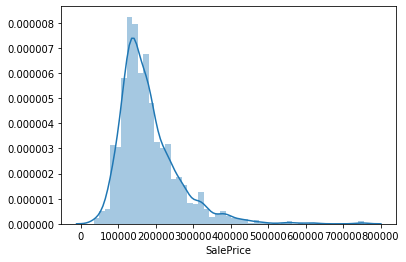

In [53]:
sns.distplot(house['SalePrice'])
plt.show()

In [54]:
#Since we have some outliers present in our data so we will be using log transformation
house['SalePrice'] = np.log(house['SalePrice'])

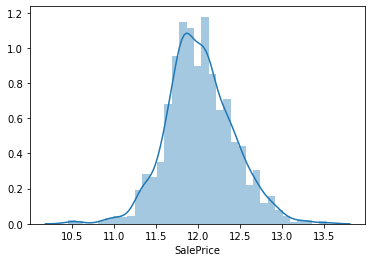

In [55]:
sns.distplot(house['SalePrice'])
plt.show()

As we can see after the transformation the target variable is normally distributed

In [56]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SaleType',
       'SaleCondition', 'SalePrice', 'AgeBuilt'],
      dtype='object')

In [57]:
#Combining 2-3 levels together for MSSubClass
house['MSSubClass'] = house['MSSubClass'].map({'20':'20,30,40','30':'20,30,40','40':'20,30,40','45':'45,50','50':'45,50','60':'60,70,75','70':'60,70,75','75':'60,70,75','80':'80,85','85':'80,85','90':'90,120,150','120':'90,120,150','150':'90,120,150','160':'160,180,190','180':'160,180,190','190':'160,180,190'})

In [58]:
#Combining 2-3 levels together for Neighborhood
house['Neighborhood'] = house['Neighborhood'].map({'Blmngtn':'Blmngtn,Blueste,BrDale,BrkSide',
'Blueste':'Blmngtn,Blueste,BrDale,BrkSide','BrDale':'Blmngtn,Blueste,BrDale,BrkSide',
'BrkSide':'Blmngtn,Blueste,BrDale,BrkSide','ClearCr':'ClearCr,CollgCr,Crawfor,Edwards',
'CollgCr':'ClearCr,CollgCr,Crawfor,Edwards','Crawfor':'ClearCr,CollgCr,Crawfor,Edwards',
'Edwards':'ClearCr,CollgCr,Crawfor,Edwards','Gilbert':'Gilbert,IDOTRR,MeadowV,Mitchel',
'IDOTRR':'Gilbert,IDOTRR,MeadowV,Mitchel','MeadowV':'Gilbert,IDOTRR,MeadowV,Mitchel',
'Mitchel':'Gilbert,IDOTRR,MeadowV,Mitchel','Names':'Names,NoRidge,NPkVill,NridgHt,NWAmes',
'NoRidge':'Names,NoRidge,NPkVill,NridgHt,NWAmes','NPkVill':'Names,NoRidge,NPkVill,NridgHt,NWAmes',
'NridgHt':'Names,NoRidge,NPkVill,NridgHt,NWAmes','NWAmes':'Names,NoRidge,NPkVill,NridgHt,NWAmes',
'OldTown':'OldTown,SWISU,Sawyer,SawyerW','SWISU':'OldTown,SWISU,Sawyer,SawyerW','Sawyer':'OldTown,SWISU,Sawyer,SawyerW',
'SawyerW':'OldTown,SWISU,Sawyer,SawyerW','Somerst':'Somerst,StoneBr,Timber,Veenker',
'StoneBr':'Somerst,StoneBr,Timber,Veenker','Timber':'Somerst,StoneBr,Timber,Veenker',
'Veenker':'Somerst,StoneBr,Timber,Veenker'})

In [59]:
#Combining last 4 levels together for Condition1
house['Condition1'] = house['Condition1'].map({'Norm':'Norm','Feedr':'Feedr','Artery':'Artery',
'RRAn':'RRAn','PosN':'PosN','RRAe':'RRAe,PosA,RRNn,RRNe','PosA':'RRAe,PosA,RRNn,RRNe','RRNn':'RRAe,PosA,RRNn,RRNe',
                                               'RRNe':'RRAe,PosA,RRNn,RRNe'})

In [60]:
#Combining levels for Exterior1st
house['Exterior1st'] = house['Exterior1st'].map({'VinylSd':'VinylSd','HdBoard':'HdBoard','MetalSd':'MetalSd',
'Wd Sdng':'Wd Sdng','Plywood':'Plywood','CemntBd':'CemntBd','BrkFace':'BrkFace','WdShing':'WdShing,Stucco',
'Stucco':'WdShing,Stucco','AsbShng':'AsbShng,BrkComm,Stone,CBlock,AsphShn,ImStucc',
'BrkComm':'AsbShng,BrkComm,Stone,CBlock,AsphShn,ImStucc','Stone':'AsbShng,BrkComm,Stone,CBlock,AsphShn,ImStucc',
'CBlock':'AsbShng,BrkComm,Stone,CBlock,AsphShn,ImStucc','AsphShn':'AsbShng,BrkComm,Stone,CBlock,AsphShn,ImStucc',
'ImStucc':'AsbShng,BrkComm,Stone,CBlock,AsphShn,ImStucc'})

In [61]:
#Combining some levels of Exterior2nd
house['Exterior2nd'] = house['Exterior2nd'].map({'VinylSd':'VinylSd','MetalSd':'MetalSd','HdBoard':'HdBoard',
'Wd Sdng':'Wd Sdng','Plywood':'Plywood','CmentBd':'CmentBd',
'Wd Shng':'Wd Shng,Stucco','Stucco':'Wd Shng,Stucco','BrkFace':'BrkFace,AsbShng','AsbShng':'BrkFace,AsbShng',
'ImStucc':'ImStucc,Brk Cmn,Stone,AsphShn,CBlock,Other','Brk Cmn':'ImStucc,Brk Cmn,Stone,AsphShn,CBlock,Other',
'Stone':'ImStucc,Brk Cmn,Stone,AsphShn,CBlock,Other','AsphShn':'ImStucc,Brk Cmn,Stone,AsphShn,CBlock,Other',
'CBlock':'ImStucc,Brk Cmn,Stone,AsphShn,CBlock,Other','Other':'ImStucc,Brk Cmn,Stone,AsphShn,CBlock,Other'})

In [62]:
#Combining come levels of SaleType
house['SaleType'] = house['SaleType'].map({'WD':'WD','New':'New','COD':'COD','ConLD':'ConLD,ConLI,ConLw,CWD,Con,Oth',
'ConLI':'ConLD,ConLI,ConLw,CWD,Con,Oth','ConLw':'ConLD,ConLI,ConLw,CWD,Con,Oth','CWD':'ConLD,ConLI,ConLw,CWD,Con,Oth',
'Con':'ConLD,ConLI,ConLw,CWD,Con,Oth','Oth':'ConLD,ConLI,ConLw,CWD,Con,Oth'})

In [63]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SaleType',
       'SaleCondition', 'SalePrice', 'AgeBuilt'],
      dtype='object')

In [64]:
# split into X and y
X = house.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SaleType',
       'SaleCondition','AgeBuilt']] # predictors in variable X

y = house['SalePrice'] # response variable in Y


In [65]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

MSSubClass MSZoning LotShape LandContour LotConfig  \
0   60,70,75       RL      Reg         Lvl    Inside   
1   20,30,40       RL      Reg         Lvl       FR2   
2   60,70,75       RL      IR1         Lvl    Inside   
3   60,70,75       RL      IR1         Lvl    Corner   
4   60,70,75       RL      IR1         Lvl       FR2   

                           Neighborhood Condition1 BldgType HouseStyle  \
0       ClearCr,CollgCr,Crawfor,Edwards       Norm     1Fam     2Story   
1        Somerst,StoneBr,Timber,Veenker      Feedr     1Fam     1Story   
2       ClearCr,CollgCr,Crawfor,Edwards       Norm     1Fam     2Story   
3       ClearCr,CollgCr,Crawfor,Edwards       Norm     1Fam     2Story   
4  Names,NoRidge,NPkVill,NridgHt,NWAmes       Norm     1Fam     2Story   

  RoofStyle Exterior1st     Exterior2nd MasVnrType ExterQual ExterCond  \
0     Gable     VinylSd         VinylSd    BrkFace        Gd        TA   
1     Gable     MetalSd         MetalSd       None        TA        TA   
2     Gable     VinylSd         VinylSd    BrkFace        Gd        TA   
3     Gable     Wd Sdng  Wd Shng,Stucco       None        TA        TA   
4     Gable     VinylSd         VinylSd    BrkFace        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0      PConc       Gd       TA           No          GLQ          Unf   
1     CBlock       Gd       TA           Gd          ALQ          Unf   
2      PConc       Gd       TA           Mn          GLQ          Unf   
3     BrkTil       TA       Gd           No          ALQ          Unf   
4      PConc       Gd       TA           Av          GLQ          Unf   

  HeatingQC KitchenQual GarageType GarageFinish GarageQual SaleType  \
0        Ex          Gd     Attchd          RFn         TA       WD   
1        Ex          TA     Attchd          RFn         TA       WD   
2        Ex          Gd     Attchd          RFn         TA       WD   
3        Gd          Gd     Detchd          Unf         TA       WD   
4        Ex          Gd     Attchd          RFn         TA       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [66]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

MSSubClass_20,30,40  MSSubClass_45,50  MSSubClass_60,70,75  \
0                    0                 0                    1   
1                    1                 0                    0   
2                    0                 0                    1   
3                    0                 0                    1   
4                    0                 0                    1   

   MSSubClass_80,85  MSSubClass_90,120,150  MSZoning_FV  MSZoning_RH  \
0                 0                      0            0            0   
1                 0                      0            0            0   
2                 0                      0            0            0   
3                 0                      0            0            0   
4                 0                      0            0            0   

   MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            1            0             0             0             1   
1            1            0             0             0             1   
2            1            0             0             0             0   
3            1            0             0             0             0   
4            1            0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4                0                0                1                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0              0              0                 1   
1              1              0                 0   
2              0              0                 1   
3              0              0                 0   
4              1              0                 0   

   Neighborhood_ClearCr,CollgCr,Crawfor,Edwards  \
0                                             1   
1                                             0   
2                                             1   
3                                             1   
4                                             0   

   Neighborhood_Gilbert,IDOTRR,MeadowV,Mitchel  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Neighborhood_Names,NoRidge,NPkVill,NridgHt,NWAmes  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  1   

   Neighborhood_OldTown,SWISU,Sawyer,SawyerW  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Neighborhood_Somerst,StoneBr,Timber,Veenker  Condition1_Feedr  \
0                                            0                 0   
1                                            1                 1   
2                                            0                 0   
3                                            0                 0   
4                                            0                 0   

   Condition1_Norm  Condition1_PosN  Condition1_RRAe,PosA,RRNn,RRNe  \
0                1                0                               0   
1                0                0                               0   
2                1                0                               0   
3                1                0        

In [67]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [68]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [69]:
# scaling the features 
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageQual_Po', 'GarageQual_TA',
       'SaleType_ConLD,ConLI,ConLw,CWD,Con,Oth', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=153)

In [70]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model Building and Evaluation

#### Select 50 features by doing rfe

In [71]:
from sklearn.linear_model import LinearRegression
lnrreg = LinearRegression()

In [72]:
from sklearn.feature_selection import RFE
rfe = RFE(lnrreg, 50)             # running RFE with 50 variables as output
rfe = rfe.fit(X_train, y_train)

In [73]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', False, 32),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 52),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 2),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 101),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 15),
 ('HalfBath', False, 47),
 ('BedroomAbvGr', False, 30),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 100),
 ('WoodDeckSF', False, 22),
 ('OpenPorchSF', False, 77),
 ('EnclosedPorch', False, 23),
 ('AgeBuilt', True, 1),
 ('MSSubClass_20,30,40', True, 1),
 ('MSSubClass_45,50', True, 1),
 ('MSSubClass_60,70,75', True, 1),
 ('MSSubClass_80,85', True, 1),
 ('MSSubClass_90,120,150', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 62),
 ('LotShape_IR3', False, 45),
 ('LotShape_Reg

In [74]:
col = X_train.columns[rfe.support_]

In [75]:
col

Index(['LotFrontage', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'AgeBuilt', 'MSSubClass_20,30,40',
       'MSSubClass_45,50', 'MSSubClass_60,70,75', 'MSSubClass_80,85',
       'MSSubClass_90,120,150', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Neighborhood_Names,NoRidge,NPkVill,NridgHt,NWAmes',
       'Neighborhood_Somerst,StoneBr,Timber,Veenker', 'Condition1_Norm',
       'BldgType_2fmCon', 'Exterior1st_BrkFace', 'ExterQual_Gd',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NB',
       'BsmtQual_TA', 'BsmtCond_NB', 'BsmtExposure_Gd', 'BsmtFinType1_NB',
       'BsmtFinType1_Unf', 'BsmtFinType2_Unf', 'GarageType_Attchd',
       'SaleType_ConLD,ConLI,ConLw,CWD,Con,Oth', 'SaleTy

In [76]:
#Not selected features
X_train.columns[~rfe.support_]

Index(['LotArea', 'MasVnrArea', 'BsmtUnfSF', '1stFlrSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       ...
       'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_NG',
       'GarageQual_Po', 'GarageQual_TA', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=103)

In [77]:
X_train[col]

LotFrontage  OverallQual  OverallCond  BsmtFinSF1  BsmtFinSF2  \
210  -1.385307e-01    -0.795151     0.381743    0.053428   -0.288653   
318   9.061413e-01     0.651479    -0.517200    1.191731   -0.288653   
239  -8.198386e-01    -0.071836    -1.416142   -0.766852   -0.288653   
986  -5.018949e-01    -0.071836     2.179628   -0.973018   -0.288653   
1416 -4.564744e-01    -1.518467     0.381743   -0.973018   -0.288653   
390  -9.106796e-01    -0.795151     2.179628   -0.444442    2.135943   
1005 -2.293718e-01    -0.795151     2.179628    0.331973   -0.288653   
568   4.065156e-01     1.374795     2.179628    2.187472   -0.288653   
342   6.454645e-16    -2.241782    -1.416142   -0.973018   -0.288653   
114  -4.110538e-01    -0.071836     2.179628    0.724567    0.641499   
499  -2.269135e-03    -0.795151     1.280685   -0.729566    1.441429   
365  -5.018949e-01    -0.795151     1.280685    0.027109   -0.288653   
308   6.454645e-16    -1.518467    -0.517200   -0.398384   -0.288653   
797  -5.927359e-01    -0.795151    -0.517200    0.277141   -0.288653   
703   2.702540e-01    -0.795151     3.078570   -0.973018   -0.288653   
858   4.519361e-01     0.651479    -0.517200   -0.973018   -0.288653   
25    1.814552e+00     1.374795    -0.517200   -0.973018   -0.288653   
88    1.587449e+00    -2.241782    -3.214027   -0.973018   -0.288653   
1129 -4.564744e-01    -0.795151    -0.517200    1.079875   -0.288653   
1425  4.519361e-01    -0.071836     0.381743   -0.973018   -0.288653   
728   6.790387e-01    -0.795151    -0.517200   -0.973018   -0.288653   
883  -4.564744e-01    -1.518467    -0.517200   -0.973018   -0.288653   
606   5.427771e-01    -0.795151    -0.517200    0.632450   -0.288653   
1183 -4.564744e-01    -0.795151     0.381743    0.827650   -0.288653   
808   6.790387e-01    -0.795151    -0.517200    0.158705    0.505077   
452   6.454645e-16    -0.071836    -0.517200    0.654382   -0.288653   
1395  8.153003e-01     1.374795    -0.517200   -0.973018   -0.288653   
1078 -1.501146e+00    -0.071836    -0.517200    0.478921   -0.288653   
146  -8.652591e-01    -0.795151     1.280685   -0.514626   -0.288653   
906   2.087075e+00     1.374795    -0.517200   -0.834843   -0.288653   
614  -2.227875e+00    -1.518467     0.381743   -0.644029    2.687833   
405   6.454645e-16    -1.518467    -1.416142    1.474662   -0.288653   
45   -4.110538e-01     2.098110    -0.517200    0.027109   -0.288653   
1443  6.454645e-16    -0.071836     0.381743   -0.973018   -0.288653   
1241  5.881977e-01     0.651479     0.381743   -0.973018   -0.288653   
537   6.454645e-16    -1.518467    -0.517200    0.342939   -0.288653   
454  -3.202128e-01    -0.795151    -0.517200    2.549361   -0.288653   
160   6.454645e-16    -0.071836     0.381743    0.474535   -0.288653   
1433  1.042403e+00    -0.071836    -0.517200   -0.973018   -0.288653   
1037  6.454645e-16     1.374795    -0.517200   -0.973018   -0.288653   
106  -4.564744e-01    -1.518467     1.280685   -0.973018   -0.288653   
1307 -4.564744e-01    -0.795151    -0.517200    0.663155   -0.288653   
876   1.087823e+00    -1.518467    -0.517200    0.415317   -0.288653   
771  -1.385307e-01    -1.518467    -0.517200    0.860549   -0.288653   
890  -4.564744e-01    -0.795151     1.280685   -0.973018   -0.288653   
420   3.610951e-01     0.651479    -0.517200    1.897962   -0.288653   
1446  6.454645e-16    -0.795151     1.280685    0.327586   -0.288653   
1315  6.790387e-01    -0.071836    -0.517200    0.123613    1.422826   
384   6.454645e-16    -0.071836    -0.517200    1.187345   -0.288653   
1047 -5.927359e-01    -0.795151    -0.517200    0.531560   -0.288653   
1333 -4.564744e-01    -0.795151     0.381743   -0.973018   -0.288653   
1337  3.767634e+00    -1.518467    -1.416142   -0.973018   -0.288653   
125  -4.564744e-01    -0.071836     2.179628    0.101680   -0.288653   
709   6.454645e-16    -0.795151     1.280685   -0.973018   -0.288653   
1332 -1.385307e-01    -1.518467     0.381743   

#### Performing Ridge Regression

In [78]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [79]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[col], y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [80]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [81]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[col], y_train)
print(ridge.coef_)

[-0.01061823  0.08810378  0.06069685 -0.01612529  0.00723093  0.01313555
 -0.00438856  0.11348095  0.03101166  0.02793104  0.030024    0.05383328
 -0.05893321  0.06327585  0.04390141  0.05010653  0.02305267  0.02311786
  0.04547524  0.02337764  0.08468108  0.04441757  0.0164904   0.02656293
  0.02402622  0.02063631  0.01965084  0.02364143  0.01302834  0.01844656
  0.01573539 -0.01478355 -0.01900588 -0.01774976  0.00855689  0.02795159
 -0.01486633 -0.03905843 -0.00880022 -0.04808118 -0.00880022  0.01861363
 -0.00880022 -0.02790399  0.01399965  0.01735801  0.0161694   0.01527797
  0.02331985  0.01511047]


In [82]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train[col])
y_pred_test = ridge.predict(X_test[col])

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8925010928802298
0.8805900047812742
17.2527406483862
8.605707723219442
0.01689788506208247
0.01964773452789827


#### Perforimng Lasso

In [83]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [84]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [85]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[col], y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
lasso.coef_

array([-9.01059248e-03,  9.18661954e-02,  6.08299332e-02, -1.27329284e-02,
        4.42768657e-03,  6.72026855e-03, -6.64931423e-03,  1.23730190e-01,
        3.07795514e-02,  2.25366288e-02,  2.89021318e-02,  5.33539632e-02,
       -6.36515720e-02,  6.11498036e-02,  4.08918681e-02,  4.51551236e-02,
        2.06878907e-02,  2.17089248e-02,  4.93315459e-02,  2.46446487e-02,
        9.39397230e-02,  5.11567666e-02,  1.46604410e-02,  2.50766505e-02,
        2.16121772e-02,  1.91484346e-02,  1.84529851e-02,  2.33430123e-02,
        1.16512553e-02,  1.77015043e-02,  1.35182361e-02, -6.46588507e-03,
       -2.28356407e-03,  0.00000000e+00,  2.67206629e-03,  2.29676917e-02,
       -1.24542440e-02, -3.44747823e-02, -2.24044264e-02, -4.12711714e-02,
       -5.12509230e-03,  1.81408291e-02, -2.14176147e-05, -2.51848537e-02,
        1.01583236e-02,  1.64528596e-02,  1.32943698e-02,  1.55355134e-02,
        1.73319231e-02,  9.58753528e-03])

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train[col])
y_pred_test = lasso.predict(X_test[col])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.892034646483592
0.8836260015697199
17.327601676495085
8.386907772996349
0.01697120634328608
0.01914819126254874


In [88]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'] ,
            'Ridge Regression': metric2
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.892501          0.892035
1   R2 Score (Test)          0.880590          0.883626
2       RSS (Train)         17.252741         17.327602
3        RSS (Test)          8.605708          8.386908
4       MSE (Train)          0.129992          0.130274
5        MSE (Test)          0.140170          0.138377

In [94]:
betas = pd.DataFrame(index=col)

In [96]:
betas.rows = col

In [97]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [98]:
pd.set_option('display.max_rows', None)
betas.head(51)

Ridge     Lasso
LotFrontage                                       -0.010618 -0.009011
OverallQual                                        0.088104  0.091866
OverallCond                                        0.060697  0.060830
BsmtFinSF1                                        -0.016125 -0.012733
BsmtFinSF2                                         0.007231  0.004428
TotalBsmtSF                                        0.013136  0.006720
2ndFlrSF                                          -0.004389 -0.006649
GrLivArea                                          0.113481  0.123730
BsmtFullBath                                       0.031012  0.030780
TotRmsAbvGrd                                       0.027931  0.022537
Fireplaces                                         0.030024  0.028902
GarageCars                                         0.053833  0.053354
AgeBuilt                                          -0.058933 -0.063652
MSSubClass_20,30,40                                0.063276  0.061150
MSSubClass_45,50                                   0.043901  0.040892
MSSubClass_60,70,75                                0.050107  0.045155
MSSubClass_80,85                                   0.023053  0.020688
MSSubClass_90,120,150                              0.023118  0.021709
MSZoning_FV                                        0.045475  0.049332
MSZoning_RH                                        0.023378  0.024645
MSZoning_RL                                        0.084681  0.093940
MSZoning_RM                                        0.044418  0.051157
LandContour_HLS                                    0.016490  0.014660
LandContour_Low                                    0.026563  0.025077
LandContour_Lvl                                    0.024026  0.021612
Neighborhood_Names,NoRidge,NPkVill,NridgHt,NWAmes  0.020636  0.019148
Neighborhood_Somerst,StoneBr,Timber,Veenker        0.019651  0.018453
Condition1_Norm                                    0.023641  0.023343
BldgType_2fmCon                                    0.013028  0.011651
Exterior1st_BrkFace                                0.018447  0.017702
ExterQual_Gd                                       0.015735  0.013518
ExterCond_Fa                                      -0.014784 -0.006466
ExterCond_Gd                                      -0.019006 -0.002284
ExterCond_TA                                      -0.017750  0.000000
Foundation_CBlock                                  0.008557  0.002672
Foundation_PConc                                   0.027952  0.022968
BsmtQual_Fa                                       -0.014866 -0.012454
BsmtQual_Gd                                       -0.039058 -0.034475
BsmtQual_NB                                       -0.008800 -0.022404
BsmtQual_TA                                       -0.048081 -0.041271
BsmtCond_NB                                       -0.008800 -0.005125
BsmtExposure_Gd                                    0.018614  0.018141
BsmtFinType1_NB                                   -0.008800 -0.000021
BsmtFinType1_Unf                                  -0.027904 -0.025185
BsmtFinType2_Unf                                   0.014000  0.010158
GarageType_Attchd                                  0.017358  0.016453
SaleType_ConLD,ConLI,ConLw,CWD,Con,Oth             0.016169  0.013294
SaleType_New                                       0.015278  0.015536
SaleType_WD                                        0.023320  0.017332
SaleCondition_Partial                              0.015110  0.009588

#### Top 10 features by Ridge

In [104]:
betas.sort_values('Ridge',ascending=False)['Ridge'].head(10)

GrLivArea              0.113481
OverallQual            0.088104
MSZoning_RL            0.084681
MSSubClass_20,30,40    0.063276
OverallCond            0.060697
GarageCars             0.053833
MSSubClass_60,70,75    0.050107
MSZoning_FV            0.045475
MSZoning_RM            0.044418
MSSubClass_45,50       0.043901
Name: Ridge, dtype: float64

#### Top 10 features by Lasso

In [105]:
betas.sort_values('Lasso',ascending=False)['Lasso'].head(10)

GrLivArea              0.123730
MSZoning_RL            0.093940
OverallQual            0.091866
MSSubClass_20,30,40    0.061150
OverallCond            0.060830
GarageCars             0.053354
MSZoning_RM            0.051157
MSZoning_FV            0.049332
MSSubClass_60,70,75    0.045155
MSSubClass_45,50       0.040892
Name: Lasso, dtype: float64

As we can see above the top 10 features selected by Ridge and Lasso are the same features i.e. GrLivArea , MSZoning_RL , 
OverallQual , MSSubClass_20,30,40 , OverallCond , GarageCars , MSSubClass_60,70,75 , MSZoning_RM , MSZoning_FV , 
MSSubClass_45,50

## Part II : Subjective Questions

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso

In [106]:
#Ridge
#Fitting Ridge model for alpha = 40 and printing coefficients which have been penalised
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[col], y_train)
print(ridge.coef_)

[-0.00803807  0.08800748  0.05996184 -0.01326162  0.00687444  0.02018033
  0.00192002  0.09967132  0.0300259   0.03157699  0.03106963  0.05384435
 -0.05506977  0.04751065  0.03362623  0.03783518  0.01666333  0.01528197
  0.03163324  0.01699805  0.06112001  0.02200989  0.01545129  0.02492484
  0.02208222  0.02081476  0.01984679  0.02280425  0.00824755  0.01792964
  0.01654757 -0.01175368 -0.0111873  -0.00980479  0.00505694  0.02670841
 -0.01295112 -0.03383189 -0.00749116 -0.04245067 -0.00749116  0.01880515
 -0.00749116 -0.02620477  0.01274265  0.01915295  0.01500177  0.01498362
  0.02135964  0.01481935]


In [107]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train[col])
y_pred_test = ridge.predict(X_test[col])

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8897041984204476
0.8798294610475555
17.701620511711404
8.660519023321417
0.017337532332724195
0.019772874482468988


As we can see the after doubling the alpha the test and train R2 is decreased little and 
the rss and mse values have increased a little.

In [109]:
#Lasso
#Fitting Lasso model for alpha = 0.002 and printing coefficients which have been penalised

alpha = 0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[col], y_train) 
print(lasso.coef_)

[-2.88420628e-03  9.78619077e-02  6.08403800e-02 -7.00733608e-03
  1.10644921e-03  1.34882124e-02 -0.00000000e+00  1.09680490e-01
  3.02024268e-02  2.48997951e-02  2.94572467e-02  5.41366054e-02
 -5.94596685e-02  2.63157460e-02  1.81888935e-02  1.56803260e-02
  4.70674241e-03  3.47367904e-03  1.69660481e-02  9.83032203e-03
  3.99774522e-02  0.00000000e+00  1.14348288e-02  2.11515388e-02
  1.67712780e-02  1.69914087e-02  1.77189319e-02  2.20924041e-02
  2.42885608e-04  1.63980274e-02  1.25068874e-02 -5.48878578e-03
 -7.55071967e-04  0.00000000e+00 -0.00000000e+00  2.33223330e-02
 -6.56958509e-03 -2.24197053e-02 -1.67874212e-02 -2.72492331e-02
 -3.27805641e-03  1.76060865e-02 -3.71446663e-05 -2.07609428e-02
  5.26666717e-03  1.87837837e-02  1.00017204e-02  2.16689809e-02
  1.14500084e-02  0.00000000e+00]


In [110]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train[col])
y_pred_test = lasso.predict(X_test[col])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.884780276970824
0.88188666922781
18.491871706067585
8.512258969440182
0.018111529584787057
0.01943438120876754


As we can see the after doubling the alpha the test and train R2 is decreased little and
the rss and mse values have increased a little

In [112]:
betas = pd.DataFrame(index=col)
betas.rows = col
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [113]:
betas.sort_values('Ridge',ascending=False)['Ridge'].head(10)

GrLivArea              0.099671
OverallQual            0.088007
MSZoning_RL            0.061120
OverallCond            0.059962
GarageCars             0.053844
MSSubClass_20,30,40    0.047511
MSSubClass_60,70,75    0.037835
MSSubClass_45,50       0.033626
MSZoning_FV            0.031633
TotRmsAbvGrd           0.031577
Name: Ridge, dtype: float64

In [114]:
betas.sort_values('Lasso',ascending=False)['Lasso'].head(10)

GrLivArea              0.109680
OverallQual            0.097862
OverallCond            0.060840
GarageCars             0.054137
MSZoning_RL            0.039977
BsmtFullBath           0.030202
Fireplaces             0.029457
MSSubClass_20,30,40    0.026316
TotRmsAbvGrd           0.024900
Foundation_PConc       0.023322
Name: Lasso, dtype: float64

Some features remain in the top 10 but some new features are there in top 10 on increasing the alpha to twice its value